In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import math
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
from pprint import pprint
import os
from sklearn import preprocessing
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS
from influxdb_client.client.flux_table import FluxTable
from datetime import datetime, timedelta
from typing import List
import itertools
from datetime import datetime
from datetime import timedelta
import itertools
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from hurst import compute_Hc, random_walk
import tikzplotlib

In [5]:
brown_data = random_walk(1000, min_lookback=1, max_lookback=2, cumprod=True)
brown_H, _, _ = compute_Hc(brown_data, kind='price', simplified=True)
brown_H

0.5396743008314643

In [82]:
brown_data = random_walk(100, min_lookback=1, max_lookback=2, cumprod=True)
brown_data_pow_100 = [math.pow(d, 100) for d in brown_data]
brown_pow_100_H, _, _ = compute_Hc(brown_data_pow_100, kind='random_walk', simplified=True)
brown_pow_100_H

0.5069782749200513

In [220]:
min(brown_data_pow_100)

0.4949576039367733

In [221]:
max(brown_data_pow_100)


1.6336809731519555

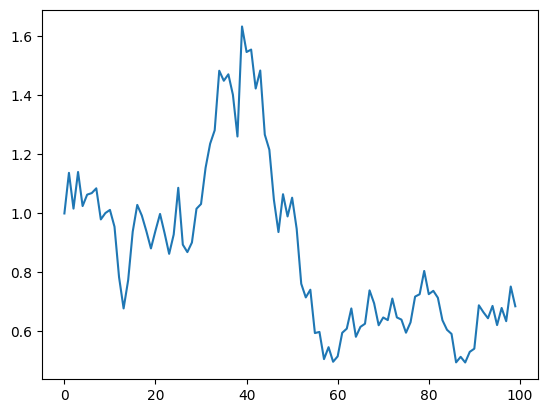

In [184]:
plt.plot(brown_data_pow_100)
plt.savefig("brown_data_pow_100.png")

In [512]:
brown_data_pow_10 = None
while True:
    brown_data = random_walk(100, min_lookback=1, max_lookback=2, cumprod=True)
    brown_data_pow_10 = [math.pow(d, 100) for d in brown_data]
    brown_pow_10_H, _, _ = compute_Hc(brown_data_pow_10, kind='random_walk', simplified=True)
    if 0.5 <= brown_pow_10_H <= 0.51:
        if 0.54 <= nk.entropy_fuzzy(brown_data_pow_10)[0] <= 0.57:
            break
    print(brown_pow_10_H, np.std(brown_data_pow_10), nk.entropy_fuzzy(brown_data_pow_10))

0.5536129113976725 0.27684927367914197 (0.6770076840921752, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.05564879783491691})
0.4422131351556456 0.2626075000264581 (0.6475516457541949, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.05278609361945499})
0.5144517011001007 0.442514691746222 (0.6436629476727403, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.08894879980254533})
0.39352781008612675 0.13259277749071544 (0.9167206726854257, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.026652151081683895})
0.810339294006299 0.5155721631645639 (0.31058085298359217, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.10363390409507585})
0.44079493907052775 0.45069808629147035 (0.5838193731505208, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.09059372399757744})
0.48159908361707165 0.6642545845963339 (0.689374130181674, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.13352019529572298})
0.46382737357121584 0.267300708215006 (0.6184862165724786, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.05372946396032995})
0.637734309

In [513]:
brown_pow_10_H, np.std(brown_data_pow_10), nk.entropy_fuzzy(brown_data_pow_10)

(0.5011894870614706,
 0.6016706923824752,
 (0.5617332219187173,
  {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.12094035963551607}))

In [514]:
max(brown_data_pow_10)


2.812880861918592

In [515]:
min(brown_data_pow_10)


0.7873242369678208

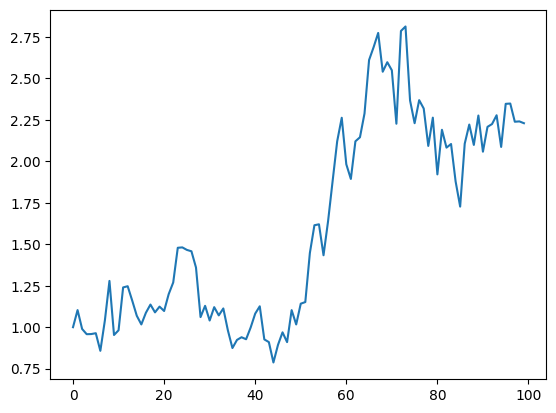

In [516]:
plt.plot(brown_data_pow_10)
plt.savefig("brown_data_pow_100.png")

In [219]:
brown_pow_10_H, _, _ = compute_Hc(brown_data_pow_10, kind='random_walk', simplified=True)
brown_pow_10_H

0.5067911209118302

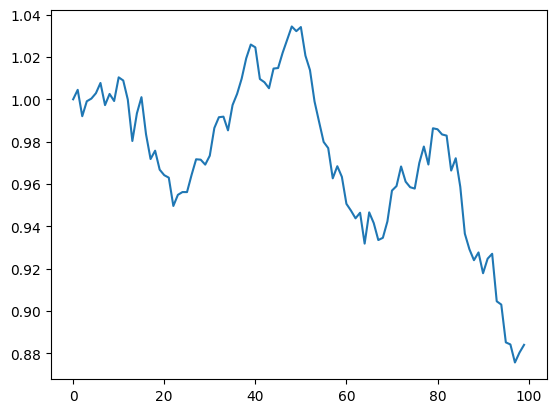

In [216]:
plt.plot(brown_data_pow_10)
plt.savefig("brown_data_pow_10.png")

In [428]:
brown_data = None
while True:
    brown_data = random_walk(100, min_lookback=50, max_lookback=50, cumprod=True)
    brown_data_pow_200 = [math.pow(d, 200) for d in brown_data]
    brown_pow_200_H, _, _ = compute_Hc(brown_data_pow_100, kind='random_walk', simplified=True)
    if 16 <= max(brown_data_pow_200) <=17:
        if 3.3 <= np.std(brown_data_pow_200) <= 3.4:
            break
    print(brown_pow_200_H, max(brown_data_pow_200), np.std(brown_data_pow_200))

0.5069782749200513 43.198296012073705 9.526720727535196
0.5069782749200513 11.681445303941024 2.9642173602988295
0.5069782749200513 1.3722240967916777 0.3148734895236343
0.5069782749200513 52.256799793111234 12.98412177391171
0.5069782749200513 4.413415592012269 1.032316379362439
0.5069782749200513 16.81552174692596 3.770043651703512
0.5069782749200513 3.3150144290350796 0.7658589243739801
0.5069782749200513 1.7203587813768242 0.4547238912974042
0.5069782749200513 1.3972523112657105 0.33653290271714603
0.5069782749200513 5.612986467557562 1.3402668659617585
0.5069782749200513 31.17340624019657 5.2685953554446225
0.5069782749200513 7.138304943067444 1.153642439195589
0.5069782749200513 1.0425547926252554 0.20267351182370238
0.5069782749200513 1.0 0.21059862897326856
0.5069782749200513 2.0549422823195846 0.37906709539471356
0.5069782749200513 1.445185980636692 0.3115324074491708
0.5069782749200513 1.0 0.1492117289003539
0.5069782749200513 18.500822480155236 4.6893334327737195
0.506978274

In [430]:
brown_pow_200_H

0.5069782749200513

In [431]:
max(brown_data_pow_200)

16.349460524394985

In [433]:
min(brown_data_pow_200)


0.7268208263821182

In [432]:
np.std(brown_data_pow_200)

3.3283191990796435

In [434]:
nk.entropy_fuzzy(brown_data_pow_200)

(0.5462535882286882,
 {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.6690173312656591})

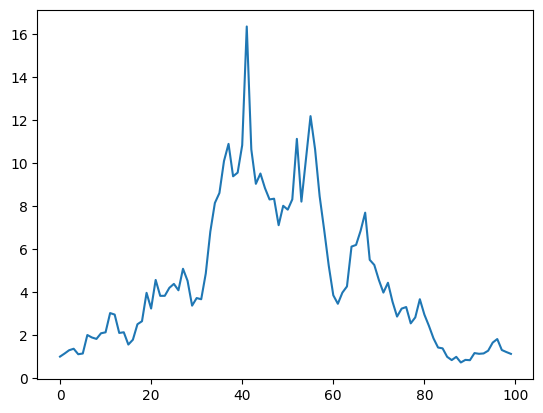

In [429]:
plt.plot(brown_data_pow_200)
plt.savefig("brown_data_pow_200.png")

In [224]:
min(brown_data_pow_200)

0.8580471328050557

In [225]:
max(brown_data_pow_200)


16.9631958819553

In [217]:
np.std(brown_data_pow_10)

0.03644280607832684

In [182]:
np.std(brown_data_pow_100)

0.2823656733858188

In [183]:
np.std(brown_data_pow_200)

3.71934231863308

In [218]:
nk.entropy_fuzzy(brown_data_pow_10)

(0.5679698331253222,
 {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.00732527964057535})

In [131]:
nk.entropy_fuzzy(brown_data_pow_100)

(0.6413894331194115,
 {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.05675763589677592})

In [180]:
nk.entropy_fuzzy(brown_data_pow_200)

(0.6308747913755506,
 {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.7476159356240246})

In [227]:
brown_data = random_walk(100, min_lookback=50, max_lookback=50, cumprod=True)
brown_data_pow_300 = [math.pow(d, 300) for d in brown_data]
brown_pow_300_H, _, _ = compute_Hc(brown_data_pow_100, kind='random_walk', simplified=True)
brown_pow_300_H

0.5069782749200513

In [228]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]

def noise_psd(N, psd = lambda f: 1):
    X_white = np.fft.rfft(np.random.randn(N));
    S = psd(np.fft.rfftfreq(N))
    # Normalize S
    S = S / np.sqrt(np.mean(S**2))
    X_shaped = X_white * S;
    return np.fft.irfft(X_shaped);

def PSDGenerator(f):
    return lambda N: noise_psd(N, f)

@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def blue_noise(f):
    return np.sqrt(f);

@PSDGenerator
def violet_noise(f):
    return f;

@PSDGenerator
def brownian_noise(f):
    return 1/np.where(f == 0, float('inf'), f)

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f))

In [235]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""

    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

In [411]:
white_data = None
while True:
    white_data = white_noise(100)
    try:
        white_pow_100 = [math.pow(d+3, 1.6) for d in white_data]
    except:
        continue
    white_pow_100_H, _, _ = compute_Hc(white_pow_100, kind='random_walk', simplified=True)
    if 16.5 <= max(white_pow_100) <= 17:
        if 0.90 <= min(white_pow_100) <= 0.99:
            if 3.3 <= np.std(white_pow_100) <= 3.4:
                break
    print(max(white_pow_100), np.std(white_pow_100))

18.158547289547045 2.934262628545954
13.764799460734988 2.977297913430651
16.033255652502397 2.978628792590323
14.839436973178339 3.662661285986712
13.766127895416632 2.9712035618579495
13.975295595890772 3.062251778929245
17.99768789917914 3.16693648477008
15.165235108062392 2.918191384266052
14.68336507629321 2.938011030375316
13.725403139340113 3.1268447420641285
15.919714704601114 3.3007492864557353
13.91635945778019 3.5411352214067597
14.268488130880236 2.998105281767991
16.098334908688454 3.0137453048022373
17.298202623196993 3.4139678241272193
18.086546600756552 2.9783698891561556
14.366660238543043 3.023980458306968
14.59385422631 2.87825040640212
13.728831643018873 2.8815061405748104
18.60399587800335 3.3013005187622086
22.384592960953018 3.256809716736607
16.114900113368538 3.3681060966702856
18.187386493666484 3.262203459324892
11.243948429113361 2.3850713652979794
18.498484255504668 3.339714796233636
14.831572540669221 3.2906799478027704
14.682334062448884 2.954378954895664

In [415]:
min(white_data)

-2.0561538221778126

In [412]:
white_pow_100 = [math.pow(d+3, 1.6) for d in white_data]

In [416]:
min(white_pow_100)


0.9116790065744033

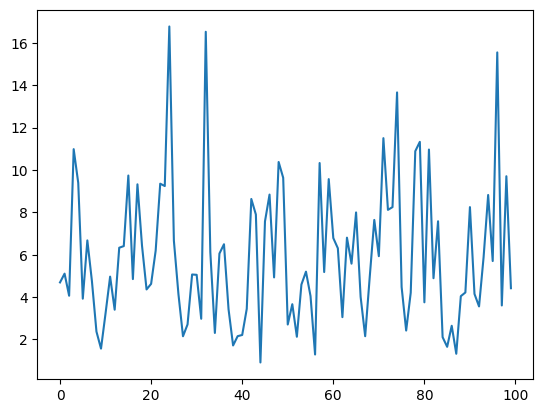

In [435]:
plt.plot(white_pow_100)
plt.savefig("white_pow_100.png")

In [414]:
white_pow_100_H, _, _ = compute_Hc(white_pow_100, kind='random_walk', simplified=True)
white_pow_100_H

0.2302548083939134

In [287]:
np.std(white_pow_100)

3.7036043293499317

In [288]:
max(white_pow_100)

16.331318547120087

In [289]:
min(white_pow_100)


0.8233212466794292

In [417]:
nk.entropy_fuzzy(white_pow_100)

(1.5259691345877302,
 {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.6709771810192419})

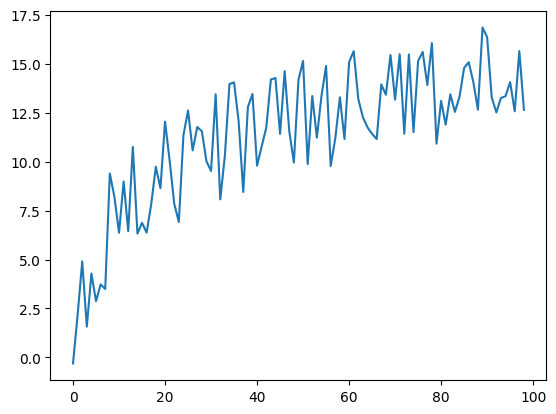

In [322]:
plt.plot(list([math.log(r, 1.38) + random.uniform(3, -3) for r in range(1, 100)]))

In [491]:
log_data_100 = None
while True:
    log_data_100 = [math.log(r+1.5, 1.33) + random.uniform(1, -1) for r in range(0, 100)]
    log_data_H, _, _ =compute_Hc(log_data_100, kind='random_walk', simplified=True)
    if nk.entropy_fuzzy(log_data_100)[0] < 0.42:
        if 1 > min(log_data_100) > 0:
            if np.std(log_data_100) > 3.3:
                break
    print(max(log_data_100), min(log_data_100), np.std(log_data_100), log_data_H, nk.entropy_fuzzy(log_data_100))

16.77186274287107 1.4724680205634342 3.2179953345428363 0.8775765417401621 (0.5320822744571283, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.646841400108654})
16.95847190518075 0.86841458075544 3.1899896156672938 0.888999611262443 (0.490997684922243, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.6412120388059661})
16.7814699850258 0.8998696101531756 3.130994926526293 0.8701481202323145 (0.5125206737016785, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.6293536601087326})
16.861169134377906 0.6375136847470495 3.2018647360718364 0.8912484848019528 (0.4774029892987314, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.6435990278194305})
16.906501500591027 1.3803374177361392 3.190145742107248 0.847899327738719 (0.5077487584917064, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.6412434214011893})
17.100847419555624 0.6787199183126775 3.1511309017157805 0.838765857608498 (0.4928796662147804, {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.6334011434112439})
16.618529285232643 1.6673845409379373 3.0712850023768

In [492]:
max(log_data_100), min(log_data_100), np.std(log_data_100), log_data_H, nk.entropy_fuzzy(log_data_100)

(16.925179839105773,
 0.577872358303313,
 3.396841022218081,
 0.8706951643402616,
 (0.4084191572202458,
  {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.6827907359505857}))

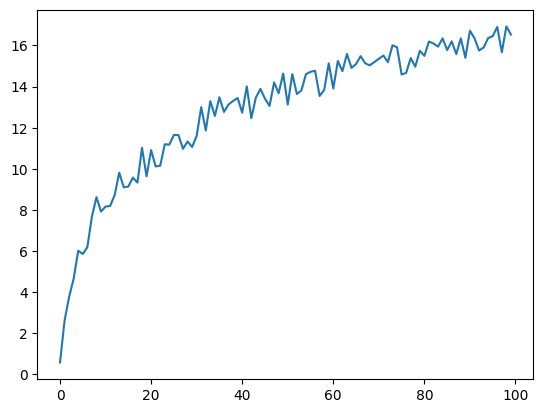

In [493]:
plt.plot(log_data_100)
pl

In [343]:
h, _, _ =compute_Hc(log_data_100, kind='random_walk', simplified=True)
h

0.5299773148495005

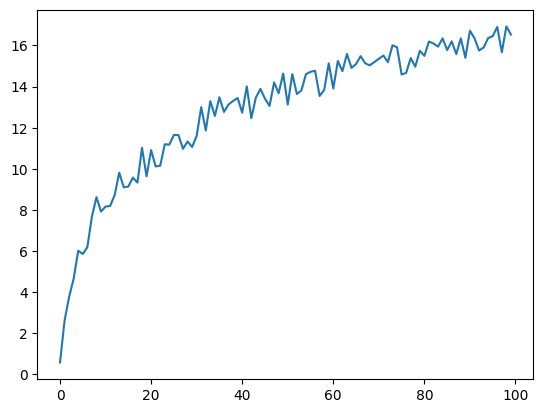

In [494]:
plt.plot(log_data_100)
plt.savefig("log_data_100.png")

In [328]:
np.std(log_data_100)

3.242041715311126

In [408]:
nk.entropy_fuzzy(log_data_100)

(0.4877850703531401,
 {'Dimension': 2, 'Delay': 1, 'Tolerance': 0.6655112297985549})